In [1]:
%matplotlib notebook 

import csv
import json
import numpy 
import os
import sys
import time

import skimage.color
import skimage.io
import skimage.measure
import skimage.transform

import matplotlib.patches
import matplotlib.path
import matplotlib.pyplot
import matplotlib.transforms

In [60]:
imageDir = '../../../../cetres/images/cetres.b/image-contrast_2/'
labelDir = '../../../../cetres/images/cetres.b/cellmasks/'

# load image given the image number
def loadImage(frameNr, imageDir):
    image = skimage.io.imread(imageDir + getImageName(frameNr))
    return skimage.color.rgb2gray(image)

# load image given the image number
def loadLabel(frameNr, imageDir):
    data = numpy.genfromtxt(imageDir + getLabelName(frameNr), dtype=int, delimiter=',')
    return data

def getImageNameC1(frameNr):
    return('refdataB_C2_' + "%03i.png" % (frameNr,))


def getLabelName(frameNr):
    return('refdataB_' + "%03i.txt" % (frameNr,))

# json file used for export 
fileOut = 'cell_samples.json'

<IPython.core.display.Javascript object>


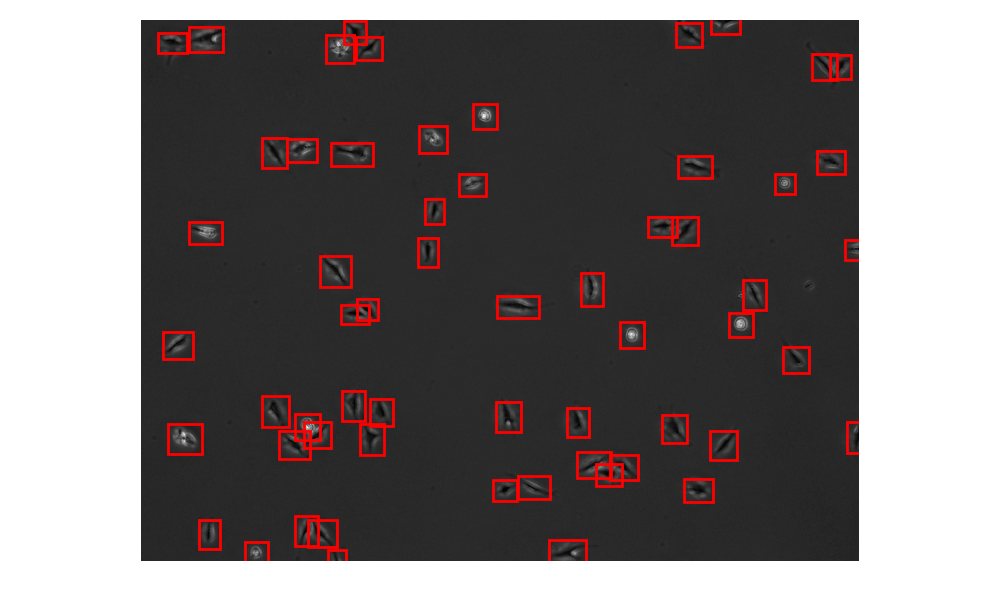

In [75]:
#for label in properties:
#    print(label.bbox)
offset = 12
    
frameNr = 102
I = loadImage(frameNr, imageDir)
L = loadLabel(frameNr, labelDir)
labels = skimage.measure.label(L)

fig, ax = matplotlib.pyplot.subplots(figsize=(10, 6))
ax.imshow(I,cmap="gray")

for region in skimage.measure.regionprops(labels):
    # take regions with large enough areas
    if region.area >= 10:
        # draw rectangle around segmented coins
        minr, minc, maxr, maxc = region.bbox
        rect = matplotlib.patches.Rectangle((minc - offset, minr - offset), maxc - minc + 2*offset, 
                                            maxr - minr + 2*offset, fill = False, edgecolor = 'red', 
                                            linewidth = 2)
        ax.add_patch(rect)

ax.set_axis_off()
matplotlib.pyplot.tight_layout()
matplotlib.pyplot.show()

In [59]:
# code from here
# https://stackoverflow.com/questions/25349178/calculating-percentage-of-bounding-box-overlap-for-image-detector-evaluation
def clip_boxes(box0, box1):
    path_coords = numpy.array([[box0[0, 0], box0[0, 1]],
                            [box0[1, 0], box0[0, 1]],
                            [box0[1, 0], box0[1, 1]],
                            [box0[0, 0], box0[1, 1]]])

    poly = matplotlib.path.Path(numpy.vstack((path_coords[:, 0],
                                path_coords[:, 1])).T, closed=True)
    clip_rect = matplotlib.transforms.Bbox(box1)

    poly_clipped = poly.clip_to_bbox(clip_rect).to_polygons()[0]

    return numpy.array([numpy.min(poly_clipped, axis=0),
                     numpy.max(poly_clipped, axis=0)])

box1 = numpy.array([[0, 0], [30, 30]])
box0 = numpy.array([[20, 10], [30, 30]])

print(clip_boxes(box0, box1))



[[ 20.  10.]
 [ 30.  30.]]


In [63]:
# load boxes for all mitotic cells 
mitosisSamples = json.load(open('../../../../mitosis/json_files/all_samples.json') )

print(mitosisSamples)

# loop over all boxes in 


[{'boxes': [{'class': 'mitosis', 'x1': 407, 'x2': 448, 'y1': 29, 'y2': 70}], 'filename': 'refdataB_C2_013.png', 'shape': [1376, 1038, 3]}, {'boxes': [{'class': 'mitosis', 'x1': 410, 'x2': 451, 'y1': 30, 'y2': 71}], 'filename': 'refdataB_C2_014.png', 'shape': [1376, 1038, 3]}, {'boxes': [{'class': 'mitosis', 'x1': 410, 'x2': 451, 'y1': 32, 'y2': 73}], 'filename': 'refdataB_C2_015.png', 'shape': [1376, 1038, 3]}, {'boxes': [{'class': 'mitosis', 'x1': 409, 'x2': 450, 'y1': 27, 'y2': 68}], 'filename': 'refdataB_C2_016.png', 'shape': [1376, 1038, 3]}, {'boxes': [{'class': 'mitosis', 'x1': 409, 'x2': 450, 'y1': 31, 'y2': 72}], 'filename': 'refdataB_C2_017.png', 'shape': [1376, 1038, 3]}, {'boxes': [{'class': 'mitosis', 'x1': 520, 'x2': 561, 'y1': 383, 'y2': 424}], 'filename': 'refdataB_C2_033.png', 'shape': [1376, 1038, 3]}, {'boxes': [{'class': 'mitosis', 'x1': 520, 'x2': 561, 'y1': 384, 'y2': 425}], 'filename': 'refdataB_C2_034.png', 'shape': [1376, 1038, 3]}, {'boxes': [{'class': 'mitosis

In [79]:
boxes_in_images = {}
for ms in mitosisSamples:
    for box in ms["boxes"]:
        try: boxes_in_images[ms["filename"]].append(box)
        except: boxes_in_images[ms["filename"]] = [ box ]
#print(boxes_in_images)


for filename in boxes_in_images.keys():
    allBoxes = boxes_in_images[filename]
    print(filename, allBoxes)
    #mitoticBoxes

refdataB_C2_013.png [{'class': 'mitosis', 'x1': 407, 'x2': 448, 'y1': 29, 'y2': 70}]
refdataB_C2_014.png [{'class': 'mitosis', 'x1': 410, 'x2': 451, 'y1': 30, 'y2': 71}]
refdataB_C2_015.png [{'class': 'mitosis', 'x1': 410, 'x2': 451, 'y1': 32, 'y2': 73}]
refdataB_C2_016.png [{'class': 'mitosis', 'x1': 409, 'x2': 450, 'y1': 27, 'y2': 68}]
refdataB_C2_017.png [{'class': 'mitosis', 'x1': 409, 'x2': 450, 'y1': 31, 'y2': 72}]
refdataB_C2_033.png [{'class': 'mitosis', 'x1': 520, 'x2': 561, 'y1': 383, 'y2': 424}]
refdataB_C2_034.png [{'class': 'mitosis', 'x1': 520, 'x2': 561, 'y1': 384, 'y2': 425}]
refdataB_C2_035.png [{'class': 'mitosis', 'x1': 519, 'x2': 560, 'y1': 383, 'y2': 424}]
refdataB_C2_040.png [{'class': 'mitosis', 'x1': 304, 'x2': 345, 'y1': 953, 'y2': 994}]
refdataB_C2_041.png [{'class': 'mitosis', 'x1': 305, 'x2': 346, 'y1': 953, 'y2': 994}]
refdataB_C2_042.png [{'class': 'mitosis', 'x1': 304, 'x2': 345, 'y1': 953, 'y2': 994}]
refdataB_C2_043.png [{'class': 'mitosis', 'x1': 306, 